### This task aims to explore the following hypothesis: 
##### If a home has more square feet of living area, then the price will be higher

# 01. Importing Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensuring created graphs are displayed w/in notebook w/out the need to 'call' them specifically

%matplotlib inline

# 02. Importing Data

In [3]:
# Project folder pathway

path = r'C:\Users\SD.DESKTOP-45BHU58\OneDrive\Desktop\CF\Section 6 - Advanced Analytics\Final Project'

In [4]:
path

'C:\\Users\\SD.DESKTOP-45BHU58\\OneDrive\\Desktop\\CF\\Section 6 - Advanced Analytics\\Final Project'

In [5]:
# Importing cleaned housing data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'austin_housing_clean_3.csv'))

# 03. Data Wrangling

In [6]:
# Checking columns

df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'propertyTaxRate',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'yearBuilt', 'price', 'numPriceChanges',
       'saleDate', 'saleMonth', 'saleYear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'medianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'age', 'value', 'ageCategory',
       'zipcode', 'zipcode_median'],
      dtype='object')

In [7]:
# Checking headers

pd.options.display.max_columns = None
df.head()

,Unnamed: 0,latitude,longitude,propertyTaxRate,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,yearBuilt,price,numPriceChanges,saleDate,saleMonth,saleYear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,value,ageCategory,zipcode,zipcode_median
0,0,30.430632,-97.663078,1.98,True,True,True,True,False,False,Single Family,2012,305000,5,9/2/2019,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,9,Below Median,<=10 Yrs,78660,289700.0
1,1,30.432672,-97.661697,1.98,True,True,True,True,False,False,Single Family,2013,295000,1,10/13/2020,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185,1768,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,8,Below Median,<=10 Yrs,78660,289700.0
2,2,30.409748,-97.639771,1.98,True,True,False,True,False,False,Single Family,2018,256125,1,7/31/2019,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,3,Below Median,<=10 Yrs,78660,289700.0
3,3,30.432112,-97.661659,1.98,True,True,True,True,False,False,Single Family,2013,240000,4,8/8/2018,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,8,Below Median,<=10 Yrs,78660,289700.0
4,4,30.437368,-97.656860,1.98,True,True,False,True,False,False,Single Family,2002,239900,3,10/31/2018,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,19,Below Median,10-20 Yrs,78660,289700.0


In [8]:
# Dropping 'Unnamed:0' column

df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# Double checking headers

df.head()

,latitude,longitude,propertyTaxRate,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,yearBuilt,price,numPriceChanges,saleDate,saleMonth,saleYear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,value,ageCategory,zipcode,zipcode_median
0,30.430632,-97.663078,1.98,True,True,True,True,False,False,Single Family,2012,305000,5,9/2/2019,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,9,Below Median,<=10 Yrs,78660,289700.0
1,30.432672,-97.661697,1.98,True,True,True,True,False,False,Single Family,2013,295000,1,10/13/2020,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185,1768,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,8,Below Median,<=10 Yrs,78660,289700.0
2,30.409748,-97.639771,1.98,True,True,False,True,False,False,Single Family,2018,256125,1,7/31/2019,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,3,Below Median,<=10 Yrs,78660,289700.0
3,30.432112,-97.661659,1.98,True,True,True,True,False,False,Single Family,2013,240000,4,8/8/2018,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,8,Below Median,<=10 Yrs,78660,289700.0
4,30.437368,-97.656860,1.98,True,True,False,True,False,False,Single Family,2002,239900,3,10/31/2018,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,19,Below Median,10-20 Yrs,78660,289700.0


In [10]:
# Checking shape

df.shape

(15024, 44)

# 04. Data Cleaning

#### Data cleaning was conducted in prior exercises, but a double-check will be done

### a. Missing Values

In [11]:
# Checking for missing values

df.isnull().sum()

latitude                      0
longitude                     0
propertyTaxRate               0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
yearBuilt                     0
price                         0
numPriceChanges               0
saleDate                      0
saleMonth                     0
saleYear                      0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWindowFeatures           0
numOfCommunityFeatures        0
lotSizeSqFt                   0
livingAreaSqFt                0
numOfPrimarySchools           0
numOfElementarySchools        0
numOfMiddleSchools            0
numOfHig

#### No missing values to handle

### b. Duplicates

In [12]:
# Checking for duplicates

df[df.duplicated()]

,latitude,longitude,propertyTaxRate,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,yearBuilt,price,numPriceChanges,saleDate,saleMonth,saleYear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,value,ageCategory,zipcode,zipcode_median


#### No duplicates to handle

### c. Mixed Data Type

In [13]:
# Checking for columns with mixed data

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

#### No mixed data types found

### d. Extreme Values

C:\Users\SD.DESKTOP-45BHU58\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='livingAreaSqFt', ylabel='Density'>

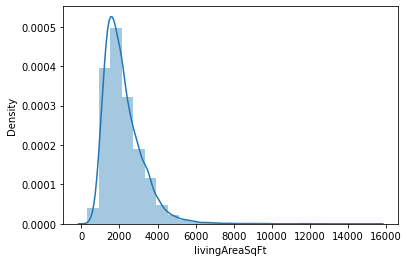

In [14]:
# Showing extreme values for 'livingAreaSqFt'

sns.distplot(df['livingAreaSqFt'], bins=25)

C:\Users\SD.DESKTOP-45BHU58\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

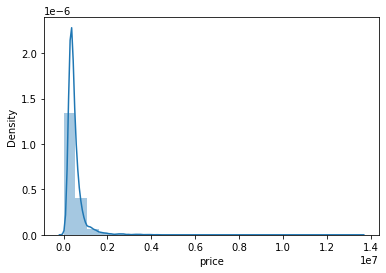

In [15]:
# Showing extreme values for 'price'

sns.distplot(df['price'], bins=25)

In [16]:
# Conducting descriptive analysis of the two variables: price & livingAreaSqFt

df[['livingAreaSqFt', 'price']].describe()

,livingAreaSqFt,price
count,15024.000000,1.502400e+04
mean,2196.415402,5.113831e+05
std,1024.487034,4.406076e+05
min,300.000000,5.500000e+03
25%,1485.000000,3.090000e+05
50%,1975.000000,4.050000e+05
75%,2686.250000,5.749990e+05
max,15394.000000,1.350000e+07


# 05. Regression Analysis: Data Prep

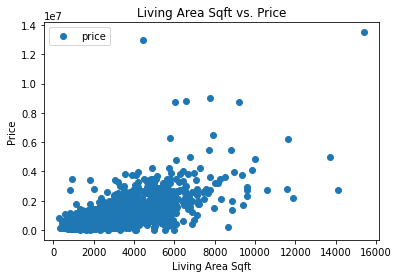

In [17]:
# Creating a scatterplot via matplotlib to see how the two variables plot against each other

df.plot(x = 'livingAreaSqFt', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Living Area Sqft vs. Price')  
plt.xlabel('Living Area Sqft')  
plt.ylabel('Price')  
plt.show()

In [18]:
# Reshaping variables into NumPy arrays and putting them into separate objects

X = df['livingAreaSqFt'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [19]:
X

array([[2601],
       [1768],
       [1478],
       ...,
       [1524],
       [6068],
       [ 720]], dtype=int64)

In [20]:
y

array([[305000],
       [295000],
       [256125],
       ...,
       [875000],
       [420000],
       [374900]], dtype=int64)

In [21]:
# Splitting the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 06. Regression Analysis

In [22]:
# Creating a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [23]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicting values of y using X

y_predicted = regression.predict(X_test)

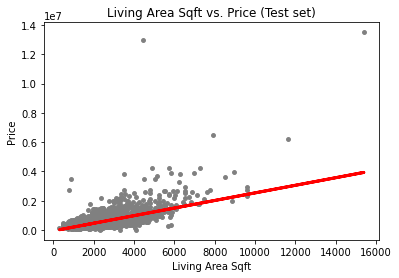

In [25]:
# Creating a scatterplot showing the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Area Sqft vs. Price (Test set)')
plot_test.xlabel('Living Area Sqft')
plot_test.ylabel('Price')
plot_test.show()

In [26]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [27]:
# Printing the model summary statistics to evaluate model performance

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[259.20922055]]
Mean squared error:  143507306122.0286
R2 score:  0.3932522509033466


### Takeaways:

● Positive slope indicates there is a positive relationship between the living area sqft and price. As the sqft rises, the price increases at a degree of 259.

● The MSE measures accuracy by taking the average squared distance between the estimated values and true values, telling us how close a regression line is to a set of points. The MSE value in the test set is quite high, indicating that a regression may not be the best model to represent this data and cannot accurately predict the influence of living area sqft on price.

● R2 metric tells us how well the model explains the variance in the data by calculating a number between 0-1. Numbers closer to 1 indicate a good fit, however, the model was not a good fit in this case because the R2 value was low at 0.3932.

In [28]:
# Creating a df comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,849000,4.671052e+05
1,495000,4.564776e+05
2,330000,3.862319e+05
3,69000,1.814566e+05
4,475000,5.871190e+05
5,250000,3.579781e+05
6,207500,3.260954e+05
7,357535,5.827125e+05
8,1399000,9.953736e+05
9,375000,5.847862e+05


#### It can be observed at first glance that several of the predicted and actual values have a big discrepency

### Overfitting Check

In [29]:
# Comparing how regression fits the training set - predicting X_train

y_predicted_train = regression.predict(X_train)

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[259.20922055]]
Mean squared error:  107116525827.48833
R2 score:  0.3911505649955702


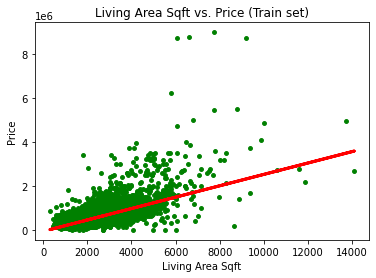

In [32]:
# Visualizing training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Area Sqft vs. Price (Train set)')
plot_test.xlabel('Living Area Sqft')
plot_test.ylabel('Price')
plot_test.show()

#### Results show no signs of model overfitting due to the R2 value from the training and test set being almost the same

The initial scatterplot shows that there is a positive correlation between living area sqft and price. However, the model is not able to explain the relationship between the two variables in depth. The summary statistics confirm that a single regression line is not the ideal predicting model for housing prices. It is possible the model was not a good fit due to only one predictor being analyzed when there could be multiple predictors at play.

# 07. Exporting Data

In [34]:
# Exporting updated dataframe as csv file

df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'austin_housing_clean_4.csv'))